<a href="https://colab.research.google.com/github/ksasi/EIP/blob/master/EIP4.0/Phase1/Session2%20-%20Assignments/NINE_EIP4_0_TPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python -V

Python 3.6.9


In [2]:
!pip install tensorflow-gpu

     |████████████████████████████████| 380.8MB 43kB/s 
     |████████████████████████████████| 450kB 47.8MB/s 
     |████████████████████████████████| 3.8MB 36.4MB/s 
     |████████████████████████████████| 81kB 10.9MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.8.1 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled goog

In [3]:
import numpy as np
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras import utils

from tensorflow.keras.datasets import mnist

print(tf.version.VERSION)
print(tf.keras.__version__)

2.0.0
2.2.4-tf


In [0]:
#tf.compat.v1.enable_eager_execution()
tf.compat.v1.disable_eager_execution() ## https://github.com/tensorflow/tensorflow/issues/34235 and https://github.com/huan/tensorflow-handbook-tpu/issues/1 for TPU

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


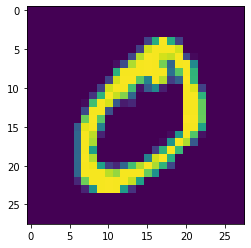

In [6]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]
Y_train = utils.to_categorical(y_train, 10)
Y_test = utils.to_categorical(y_test, 10)

In [10]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from tensorflow.keras.layers import Activation
def create_model():
  model = Sequential()
 
  model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', input_shape=(28,28,1), use_bias = False)) #26
  model.add(BatchNormalization())
  model.add(Dropout(0.1))

  model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu', use_bias = False)) #24
  model.add(BatchNormalization())
  model.add(Dropout(0.1))

  model.add(Conv2D(filters = 10, kernel_size = (1, 1), activation='relu', use_bias = False)) #22

  model.add(MaxPool2D(pool_size=(2, 2)))#11

  model.add(Conv2D(filters = 12, kernel_size = (3, 3), activation='relu', use_bias = False))#9
  model.add(BatchNormalization())
  model.add(Dropout(0.1))


  model.add(Conv2D(filters = 14, kernel_size = (3, 3), activation='relu', use_bias = False))#7
  model.add(BatchNormalization())
  model.add(Dropout(0.1))


  model.add(Conv2D(filters = 14, kernel_size = (3, 3), activation='relu', use_bias = False))#7
  model.add(BatchNormalization())
  model.add(Dropout(0.1))

  model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', use_bias = False))#7
  model.add(BatchNormalization())
  model.add(Dropout(0.1))


  model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', use_bias = False))#7
  model.add(BatchNormalization())
  model.add(Dropout(0.1))

  model.add(Conv2D(filters = 10, kernel_size = (1, 1), activation='relu', use_bias = False))#3
  model.add(BatchNormalization())
  model.add(Dropout(0.1))

  model.add(Conv2D(filters = 10, kernel_size = (2, 2)))
  #model.add(BatchNormalization())
  model.add(Dropout(0.1))


  model.add(Flatten())
  model.add(Activation('softmax'))
  return model

### Train on TPU

In [13]:
import os
from tensorflow.keras.optimizers import SGD

# TF 2.0
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
tf.config.experimental_connect_to_host(resolver.master())
tf.tpu.experimental.initialize_tpu_system(resolver)
strategy = tf.distribute.experimental.TPUStrategy(resolver)

with strategy.scope():
  model = create_model()
  model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.3), metrics=['accuracy'])

INFO:tensorflow:Initializing the TPU system: 10.28.135.2:8470
INFO:tensorflow:Finished initializing TPU system.
INFO:tensorflow:Querying Tensorflow master (grpc://10.28.135.2:8470) for TPU system metadata.
INFO:tensorflow:Found TPU system:
INFO:tensorflow:*** Num TPU Cores: 8
INFO:tensorflow:*** Num TPU Workers: 1
INFO:tensorflow:*** Num TPU Cores Per Worker: 8
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, -1, 7823539333074611377)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 17179869184, 13346691229328149447)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 17179869184, 16405287778467525800)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 17179869184, 7964849476584623749)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 16)        144       
_________________________________________________________________
batch_normalization_8 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_9 (Dropout)          (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 32)        4608      
_________________________________________________________________
batch_normalization_9 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_10 (Dropout)         (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 24, 24, 10)       

In [15]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.3 * 1/(1 + 0.319 * epoch), 10)


model.fit(X_train.astype(np.float32), Y_train.astype(np.float32), batch_size=128, steps_per_epoch=468, epochs=20, verbose=1, validation_data=(X_test.astype(np.float32), Y_test.astype(np.float32)), callbacks=[LearningRateScheduler(scheduler, verbose=1)])


Epoch 00001: LearningRateScheduler reducing learning rate to 0.3.
Epoch 1/20
468/468 [==============================] - 13s 28ms/step - loss: 0.4965 - accuracy: 0.8302 - val_loss: 0.1080 - val_accuracy: 0.9686

Epoch 00002: LearningRateScheduler reducing learning rate to 0.2274450341.
Epoch 2/20
468/468 [==============================] - 12s 27ms/step - loss: 0.2456 - accuracy: 0.9131 - val_loss: 0.0615 - val_accuracy: 0.9827

Epoch 00003: LearningRateScheduler reducing learning rate to 0.1831501832.
Epoch 3/20
468/468 [==============================] - 14s 30ms/step - loss: 0.2041 - accuracy: 0.9264 - val_loss: 0.0458 - val_accuracy: 0.9856

Epoch 00004: LearningRateScheduler reducing learning rate to 0.153295861.
Epoch 4/20
468/468 [==============================] - 15s 32ms/step - loss: 0.1892 - accuracy: 0.9291 - val_loss: 0.0448 - val_accuracy: 0.9867

Epoch 00005: LearningRateScheduler reducing learning rate to 0.1318101933.
Epoch 5/20
468/468 [==============================] - 

In [16]:

score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.028136574419381367, 0.99130005]
